<a href="https://colab.research.google.com/github/Asthagaur1512/sales-performance-dashboard/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sales_Csv.csv to sales_Csv (3).csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315 entries, 2025-07-01 to 2025-09-01
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        315 non-null    object
 1   Units_Sold     315 non-null    int64 
 2   Unit_Price     315 non-null    int64 
 3   Colour         315 non-null    object
 4   Total_Revenue  315 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.8+ KB
None


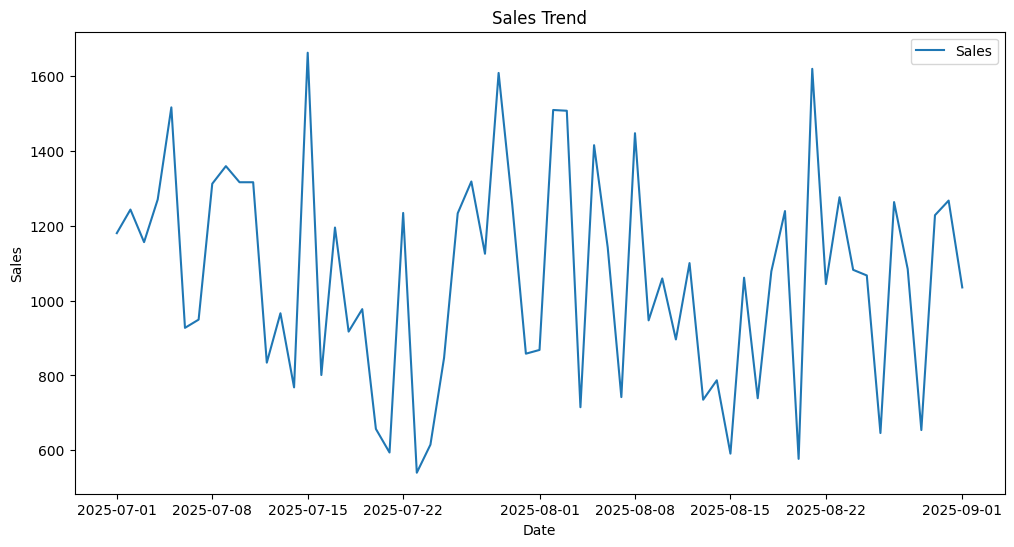

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2025-09-02    1094.683034
2025-09-03    1132.297679
2025-09-04    1087.017067
2025-09-05    1112.351888
2025-09-06    1116.737451
2025-09-07    1101.738808
2025-09-08    1106.879884
2025-09-09    1110.645769
2025-09-10    1106.398814
2025-09-11    1107.753766
2025-09-12    1108.502675
2025-09-13    1107.460795
Freq: D, Name: predicted_mean, dtype: float64


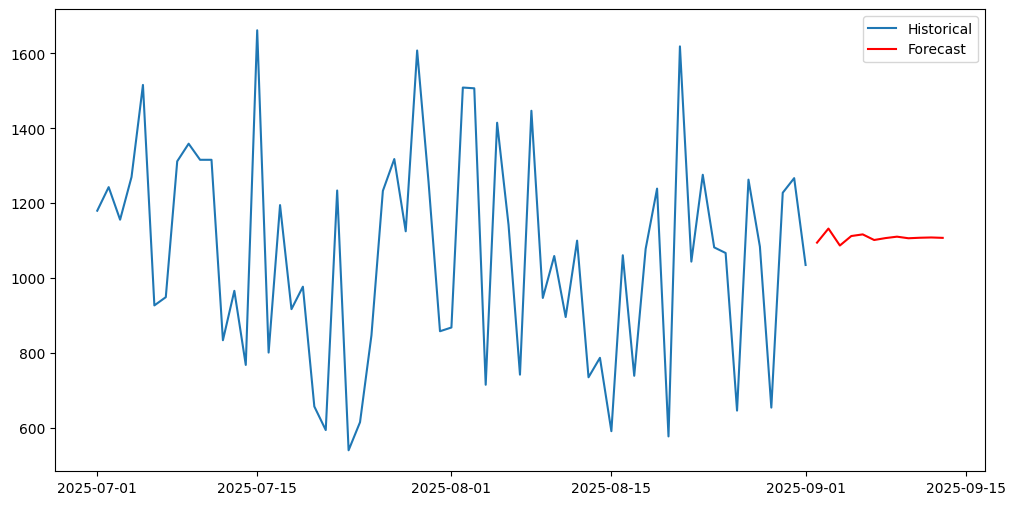

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp38gpufqx/zbsahbi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp38gpufqx/ytk70h8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94762', 'data', 'file=/tmp/tmp38gpufqx/zbsahbi6.json', 'init=/tmp/tmp38gpufqx/ytk70h8j.json', 'output', 'file=/tmp/tmp38gpufqx/prophet_modelrsb064ax/prophet_model-20250821112519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:25:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

MAE: 277.6117815337197
RMSE: 320.5014249170077


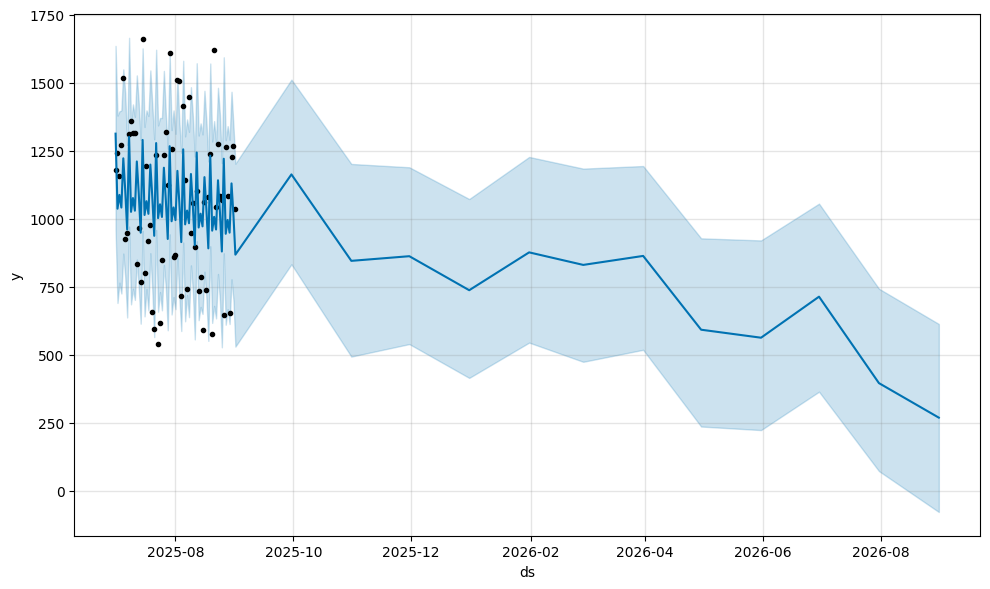

In [7]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # select stationary_shop_sales.csv
df = pd.read_csv("sales_Csv.csv")
df.head()
df['Date'] = pd.to_datetime(df['Date'])   # replace 'Date' with actual column name
df = df.sort_values('Date')
df = df.set_index('Date')

print(df.info())
df.head()
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Total_Revenue'], label="Sales")  # replace 'Sales' with your column name
plt.title("Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(daily_sales['Total_Revenue'], order=(5,1,0))  # adjust order after checking ACF/PACF
model_fit = model.fit()

# Forecast next 12 periods
forecast = model_fit.forecast(steps=12)
print(forecast)

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(daily_sales['Total_Revenue'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()
!pip install prophet

from prophet import Prophet

# Prepare data
df_prophet = daily_sales.reset_index()[['Date','Total_Revenue']]
df_prophet.columns = ['ds','y']

# Train Prophet model
m = Prophet()
m.fit(df_prophet)

# Future dataframe (next 12 months)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

# Plot forecast
fig = m.plot(forecast)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

train = daily_sales.iloc[:-12]
test = daily_sales.iloc[-12:]

model = ARIMA(train['Total_Revenue'], order=(5,1,0))
model_fit = model.fit()
pred = model_fit.forecast(steps=12)

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
print("MAE:", mae)
print("RMSE:", rmse)